# Imports

In [1]:
import spacy
import numpy as np 
import pandas as pd 
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

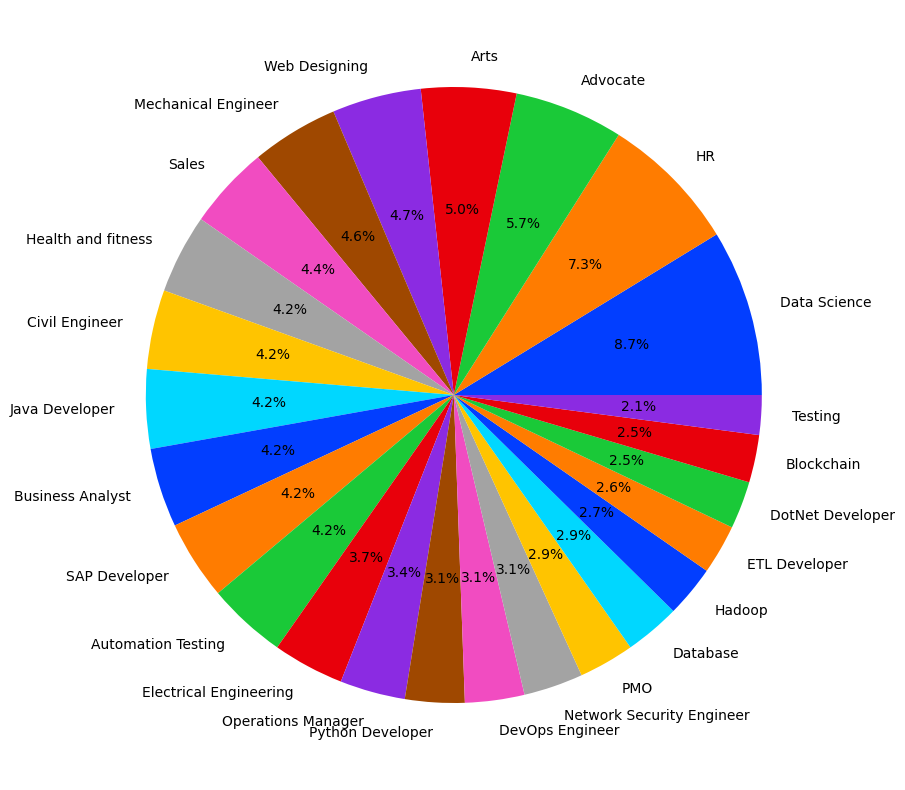

<Axes: ylabel='count'>

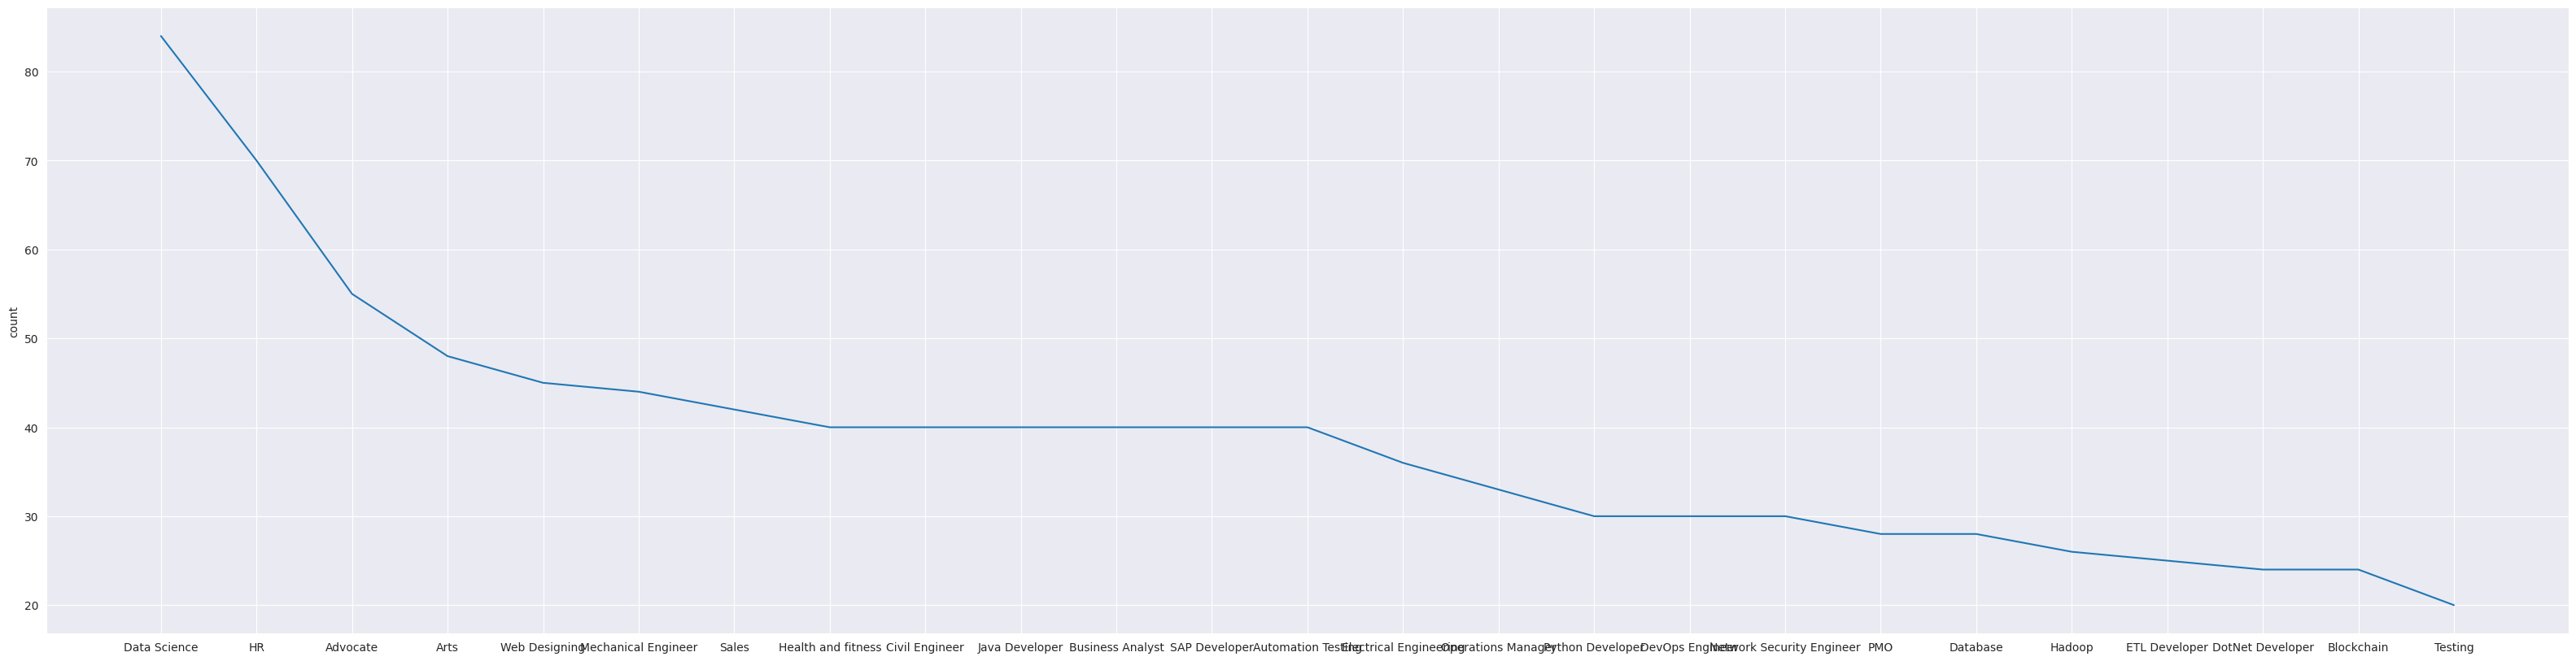

In [4]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
palette_color = sns.color_palette("bright")
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", shadow=False, colors=palette_color)
plt.show()
plt.figure(figsize=(40, 10))
sns.set_style("darkgrid")
sns.lineplot(x=labels,y=counts)

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
def preprocess(text):

    doc = nlp(text)

    li = []

    for token in doc:
        if token.is_stop or token.is_punct or token.is_space:
            continue
        
        li.append(token.lemma_)
    
    return " ".join(li)

In [7]:
def cleanResume(text):
    cleanText = re.sub('http\S+\s', ' ', text)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [8]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
df["processed_text"] = df.Resume.apply(preprocess)
df["processed_text"] = df.processed_text.apply(cleanResume)
df["vector"] = df["processed_text"].apply(lambda x: nlp(x).vector)

In [10]:
encoder = LabelEncoder()

df["Category"] = encoder.fit_transform(df["Category"])

In [11]:
df.head()

,Category,Resume,processed_text,vector
0,6,Skills * Programming Languages: Python (pandas...,skill Programming language Python pandas numpy...,"[-0.0930616, -0.63981456, -0.051863816, 0.1264..."
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details 2013 2017 B E UIT RGPV Data ...,"[-0.09646402, -0.5696769, -0.19489406, 0.01918..."
2,6,"Areas of Interest Deep Learning, Control Syste...",area Interest Deep Learning Control System Des...,"[-0.17252514, -0.62614495, -0.18245225, 0.1839..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r Python SAP HANA Tableau SAP hana SQL S...,"[-0.09546978, -0.67238516, -0.085364066, 0.162..."
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,"[-0.209182, -0.5975355, -0.30152863, 0.0565763..."


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.vector.values, df.Category.values, test_size=0.2, random_state=2023, stratify=df.Category.values)

In [13]:
x_train = np.stack(x_train)
x_test = np.stack(x_test)
x_train[:5]

array([[-9.54697803e-02, -6.72385156e-01, -8.53640661e-02,
         1.62872136e-01,  4.85911705e-02, -8.64611566e-02,
         2.92803496e-01,  7.18518794e-01,  1.04086064e-01,
         4.11421545e-02, -3.97816487e-02,  6.64468706e-01,
        -6.18017554e-01, -7.13710308e-01, -1.63986713e-01,
         3.07732821e-01, -3.02708924e-01, -2.44678110e-01,
        -6.34793460e-01, -3.37084025e-01, -5.20085879e-02,
         2.59098381e-01,  3.30996029e-02,  1.93925917e-01,
         3.88147920e-01,  1.21284099e-02,  4.45340574e-01,
         5.83586931e-01,  4.80039299e-01,  5.77226430e-02,
        -1.68206215e-01, -2.25037396e-01, -5.35966873e-01,
         1.67269558e-01, -3.03670764e-01, -1.62477344e-01,
         3.80508453e-01, -6.48918701e-03, -1.62308335e-01,
        -3.99023473e-01, -5.57166159e-01,  4.53414381e-01,
        -1.37196302e-01,  7.86981583e-01, -2.40631148e-01,
        -5.11783548e-02, -1.74687192e-01, -4.53152806e-02,
        -2.70783663e-01, -1.21642835e-02, -6.30116343e-0

# Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier(2)
KNN_Model.fit(x_train, y_train)
pred = KNN_Model.predict(x_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       0.89      1.00      0.94        17
          16       1.00      1.00      1.00         8
          17       1.00    